In [1]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [2]:
df = pd.read_csv("/Users/rolandtran/Documents/Repos/Student-Career-Prediction-System/data/cleaned/processed_raw_CareerMapping1_with_scores.csv")

In [3]:
X = df.drop(['Role', 'Role_encoded'], axis=1)

In [4]:
y = df['Role']

In [5]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [6]:
X

,Computer Architecture,Programming Skills,Project Management,Communication skills,Openness,Conscientousness,Extraversion,Agreeableness,Emotional_Range,Conversation,Openness to Change,Hedonism,Self-enhancement,Self-transcendence,tech_score,soft_skill_score
0,4.000000,4.000000,4.000000,4.000000,0.714603,0.480564,0.470877,0.039611,0.742567,0.086927,0.339776,0.091158,0.230518,0.208746,4.000000,0.340535
1,5.000000,4.000000,4.000000,4.000000,0.617218,0.452903,0.377581,0.090148,0.672546,0.071425,0.353678,0.104495,0.247432,0.196424,4.250000,0.318385
2,1.000000,4.000000,4.000000,4.000000,0.814072,0.461668,0.347739,0.138575,0.630705,0.095261,0.375125,0.135462,0.287253,0.268024,3.250000,0.355388
3,0.000000,4.000000,4.000000,4.000000,0.607495,0.521783,0.403756,0.114925,0.695280,0.122656,0.338899,0.161705,0.306562,0.258119,3.000000,0.353118
4,3.000000,4.000000,4.000000,4.000000,0.781293,0.319539,0.240337,0.050988,0.619390,0.065564,0.311896,0.147700,0.302978,0.207287,3.750000,0.304697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,0.636043,0.137336,0.226302,0.056456,0.704709,0.480178,0.558140,0.238608,0.800011,0.780420,0.889618,0.230480,0.655361,0.149937,0.264034,0.548746
4112,0.192270,0.135045,0.644441,0.782071,0.879181,0.726732,0.715623,0.976057,0.972935,0.027870,0.402814,0.862264,0.628395,0.586368,0.438457,0.677824
4113,0.554620,0.724794,0.255892,0.122183,0.159705,0.963999,0.414078,0.097954,0.402532,0.959647,0.816209,0.398565,0.441053,0.072179,0.414373,0.472592
4114,0.465681,0.103231,0.229899,0.595242,0.621454,0.010347,0.574015,0.435590,0.852310,0.640508,0.716231,0.458104,0.368780,0.516576,0.348513,0.519392


In [7]:
y_encoded

array([ 6,  6,  6, ..., 13,  8,  9], shape=(4116,))

In [8]:
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [9]:
X_scaled

,Computer Architecture,Programming Skills,Project Management,Communication skills,Openness,Conscientousness,Extraversion,Agreeableness,Emotional_Range,Conversation,Openness to Change,Hedonism,Self-enhancement,Self-transcendence,tech_score,soft_skill_score
0,0.666667,0.666667,0.666667,0.666667,0.716175,0.480310,0.470353,0.039195,0.743468,0.085414,0.339526,0.089076,0.230310,0.208745,0.761905,0.275382
1,0.833333,0.666667,0.666667,0.666667,0.618465,0.452624,0.376950,0.089797,0.673265,0.069821,0.353436,0.102451,0.247233,0.196407,0.809524,0.239215
2,0.166667,0.666667,0.666667,0.666667,0.815976,0.461397,0.347072,0.138287,0.631317,0.093798,0.374896,0.133504,0.287078,0.268101,0.619048,0.299636
3,0.000000,0.666667,0.666667,0.666667,0.608710,0.521567,0.403155,0.114607,0.696058,0.121356,0.338648,0.159821,0.306398,0.258183,0.571429,0.295929
4,0.500000,0.666667,0.666667,0.666667,0.783087,0.319139,0.239546,0.050586,0.619972,0.063925,0.311630,0.145777,0.302811,0.207285,0.714286,0.216865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,0.106007,0.022889,0.037717,0.009409,0.706248,0.479924,0.557717,0.238450,0.801059,0.783033,0.889697,0.228789,0.655399,0.149860,0.050292,0.615361
4112,0.032045,0.022508,0.107407,0.130345,0.881302,0.726702,0.715383,0.976858,0.974430,0.026006,0.402602,0.862344,0.628417,0.586858,0.083516,0.826127
4113,0.092437,0.120799,0.042649,0.020364,0.159426,0.964184,0.413489,0.097614,0.402555,0.963327,0.816244,0.397345,0.440967,0.072001,0.078928,0.491013
4114,0.077613,0.017205,0.038317,0.099207,0.622716,0.009667,0.573611,0.435689,0.853493,0.642289,0.716207,0.457051,0.368651,0.516976,0.066383,0.567430


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

In [11]:
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(le.classes_),
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

In [12]:
xgb_model.fit(X_train, y_train)

,objective,'multi:softmax'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [13]:
y_train_pred = xgb_model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
print("Accuracy của XGBoost:", accuracy_score(y_train, y_train_pred))

Accuracy của XGBoost: 1.0


In [14]:
y_test_pred = xgb_model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print("Accuracy của XGBoost:", accuracy_score(y_test, y_test_pred))

Accuracy của XGBoost: 0.7740890688259109


In [15]:
gap = train_acc - test_acc
print(f"Gap: {gap}")

Gap: 0.2259109311740891


In [16]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       279
           1       1.00      1.00      1.00       126
           2       1.00      1.00      1.00       235
           3       1.00      1.00      1.00       169
           4       1.00      1.00      1.00       124
           5       1.00      1.00      1.00       171
           6       1.00      1.00      1.00       165
           7       1.00      1.00      1.00       186
           8       1.00      1.00      1.00       108
           9       1.00      1.00      1.00       170
          10       1.00      1.00      1.00       164
          11       1.00      1.00      1.00       219
          12       1.00      1.00      1.00       183
          13       1.00      1.00      1.00       283
          14       1.00      1.00      1.00       152
          15       1.00      1.00      1.00       147

    accuracy                           1.00      2881
   macro avg       1.00   

In [17]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       101
           1       0.65      0.63      0.64        54
           2       0.83      0.81      0.82       118
           3       0.88      0.78      0.82        94
           4       0.68      0.60      0.64        43
           5       0.86      0.75      0.80        68
           6       0.67      0.74      0.70        73
           7       0.79      0.76      0.77        78
           8       0.87      0.67      0.76        72
           9       0.72      0.74      0.73        53
          10       0.75      0.74      0.74        57
          11       0.73      0.82      0.77        88
          12       0.70      0.86      0.77        77
          13       0.88      0.86      0.87       132
          14       0.81      0.72      0.76        65
          15       0.62      0.77      0.69        62

    accuracy                           0.77      1235
   macro avg       0.77   

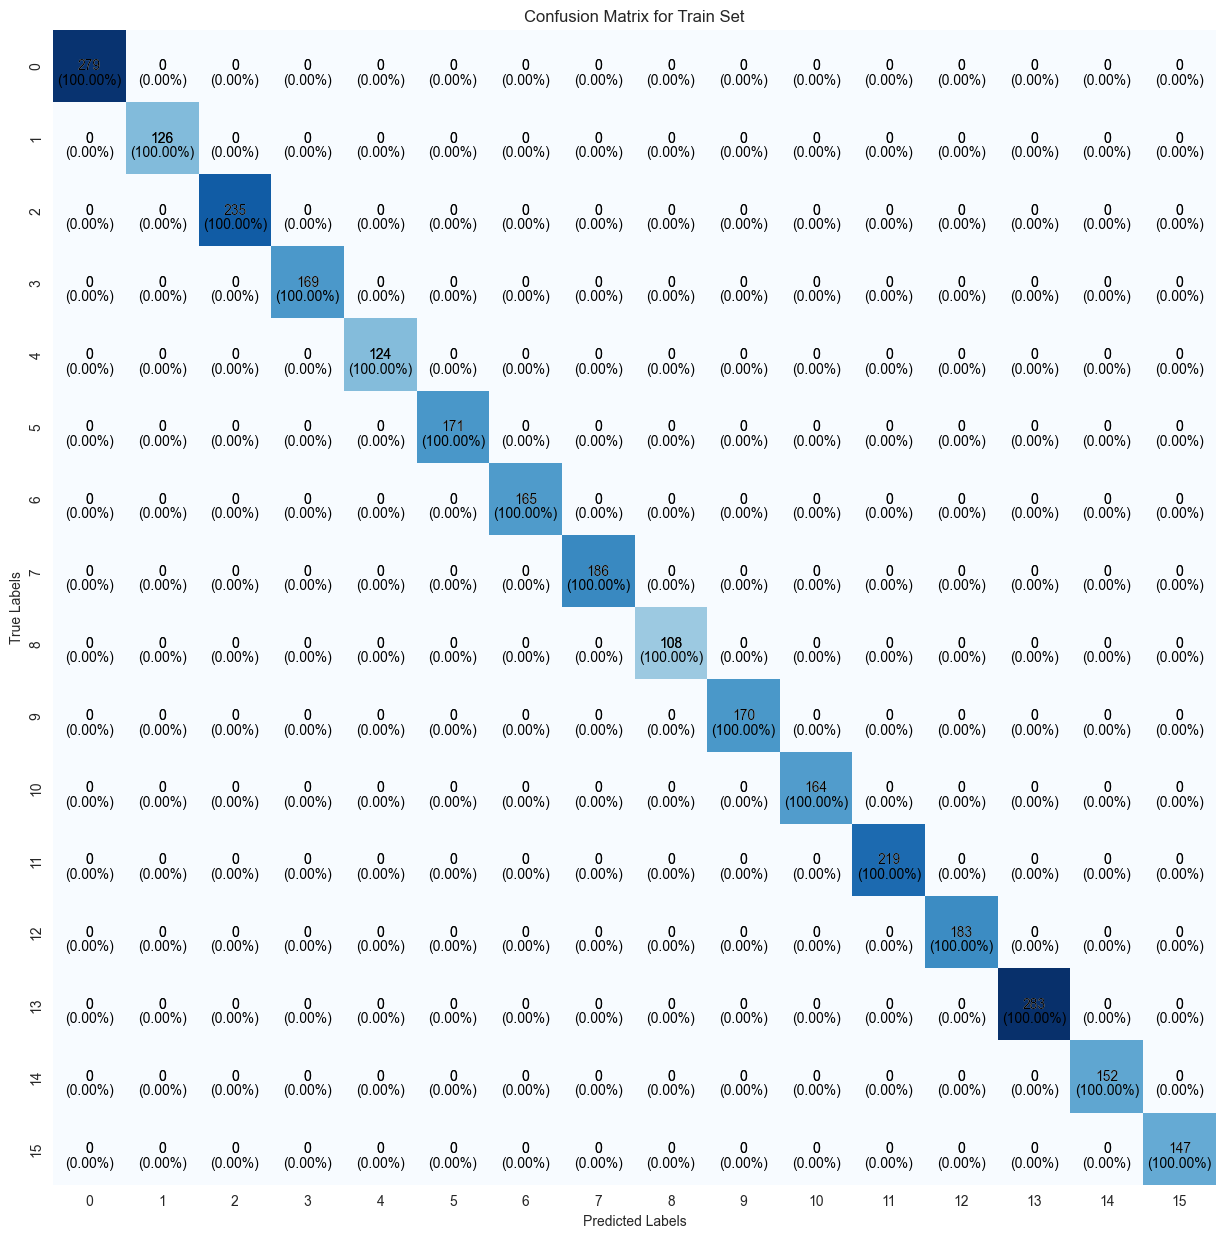

In [18]:
conf_matrix = confusion_matrix(y_train, y_train_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
#print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Train Set')
plt.show()

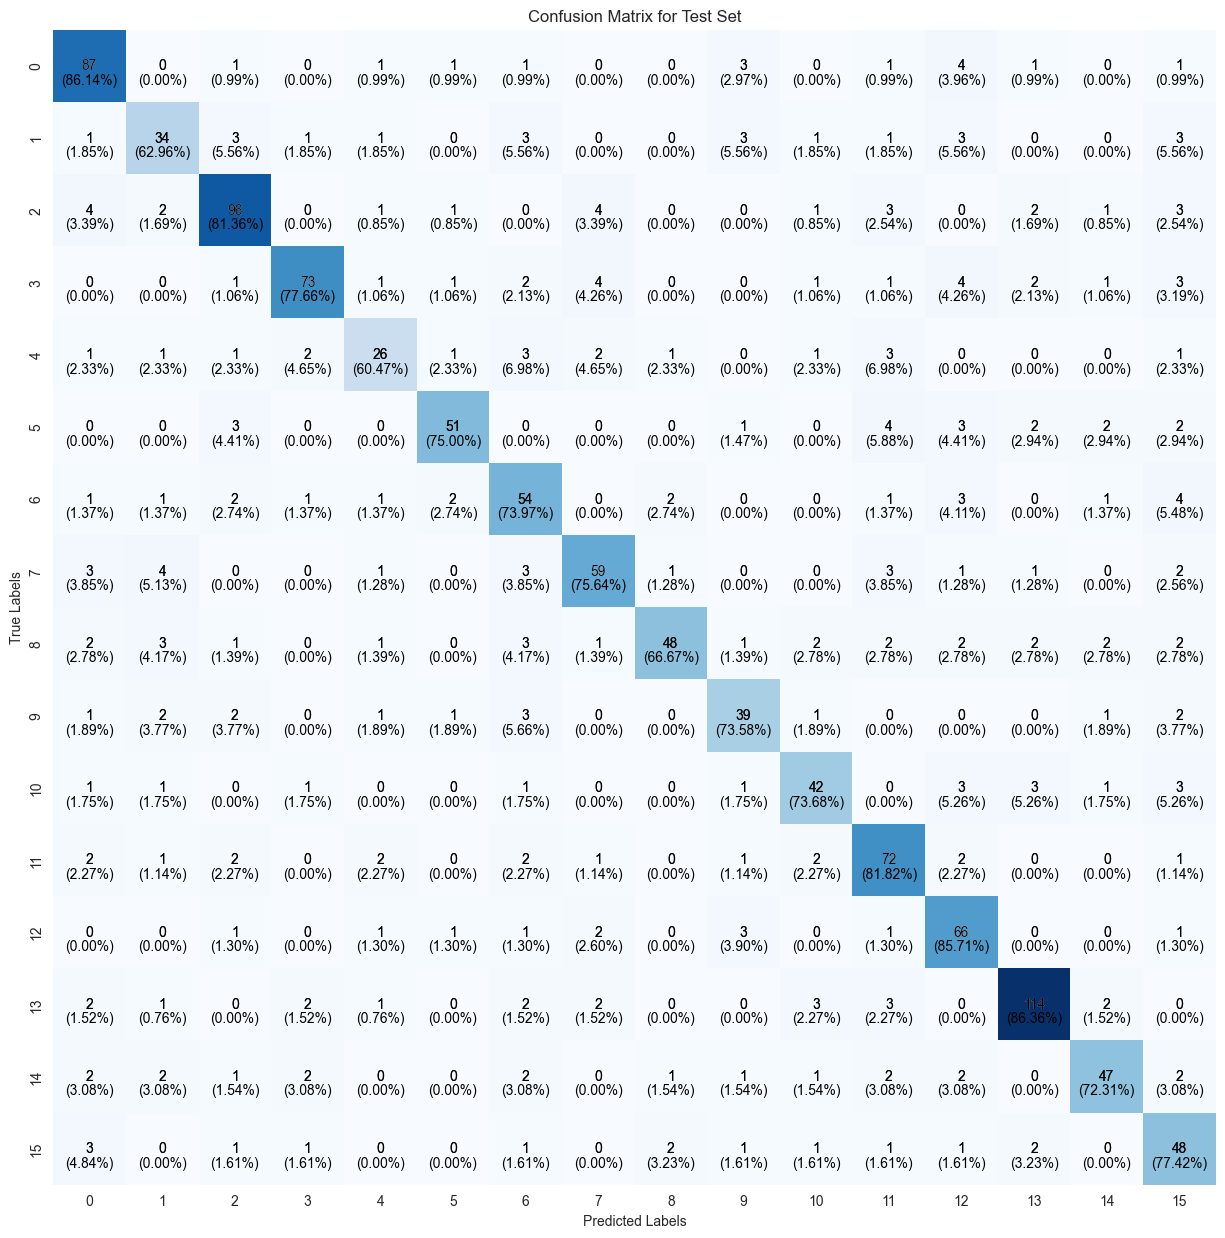

In [19]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
#print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

------------------------------------------------------------------------------------------

In [38]:
df = pd.read_csv("/Users/rolandtran/Documents/Repos/Student-Career-Prediction-System/data/cleaned/processed_raw_CareerMapping1.csv")

In [39]:
X = df.drop(['Role', 'Role_encoded'], axis=1)

In [40]:
y = df['Role']

In [41]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [42]:
X

,Computer Architecture,Programming Skills,Project Management,Communication skills,Openness,Conscientousness,Extraversion,Agreeableness,Emotional_Range,Conversation,Openness to Change,Hedonism,Self-enhancement,Self-transcendence
0,4.000000,4.000000,4.000000,4.000000,0.714603,0.480564,0.470877,0.039611,0.742567,0.086927,0.339776,0.091158,0.230518,0.208746
1,5.000000,4.000000,4.000000,4.000000,0.617218,0.452903,0.377581,0.090148,0.672546,0.071425,0.353678,0.104495,0.247432,0.196424
2,1.000000,4.000000,4.000000,4.000000,0.814072,0.461668,0.347739,0.138575,0.630705,0.095261,0.375125,0.135462,0.287253,0.268024
3,0.000000,4.000000,4.000000,4.000000,0.607495,0.521783,0.403756,0.114925,0.695280,0.122656,0.338899,0.161705,0.306562,0.258119
4,3.000000,4.000000,4.000000,4.000000,0.781293,0.319539,0.240337,0.050988,0.619390,0.065564,0.311896,0.147700,0.302978,0.207287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,0.636043,0.137336,0.226302,0.056456,0.704709,0.480178,0.558140,0.238608,0.800011,0.780420,0.889618,0.230480,0.655361,0.149937
4112,0.192270,0.135045,0.644441,0.782071,0.879181,0.726732,0.715623,0.976057,0.972935,0.027870,0.402814,0.862264,0.628395,0.586368
4113,0.554620,0.724794,0.255892,0.122183,0.159705,0.963999,0.414078,0.097954,0.402532,0.959647,0.816209,0.398565,0.441053,0.072179
4114,0.465681,0.103231,0.229899,0.595242,0.621454,0.010347,0.574015,0.435590,0.852310,0.640508,0.716231,0.458104,0.368780,0.516576


In [43]:
y_encoded

array([ 6,  6,  6, ..., 13,  8,  9], shape=(4116,))

In [44]:
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [45]:
X_scaled

,Computer Architecture,Programming Skills,Project Management,Communication skills,Openness,Conscientousness,Extraversion,Agreeableness,Emotional_Range,Conversation,Openness to Change,Hedonism,Self-enhancement,Self-transcendence
0,0.666667,0.666667,0.666667,0.666667,0.716175,0.480310,0.470353,0.039195,0.743468,0.085414,0.339526,0.089076,0.230310,0.208745
1,0.833333,0.666667,0.666667,0.666667,0.618465,0.452624,0.376950,0.089797,0.673265,0.069821,0.353436,0.102451,0.247233,0.196407
2,0.166667,0.666667,0.666667,0.666667,0.815976,0.461397,0.347072,0.138287,0.631317,0.093798,0.374896,0.133504,0.287078,0.268101
3,0.000000,0.666667,0.666667,0.666667,0.608710,0.521567,0.403155,0.114607,0.696058,0.121356,0.338648,0.159821,0.306398,0.258183
4,0.500000,0.666667,0.666667,0.666667,0.783087,0.319139,0.239546,0.050586,0.619972,0.063925,0.311630,0.145777,0.302811,0.207285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,0.106007,0.022889,0.037717,0.009409,0.706248,0.479924,0.557717,0.238450,0.801059,0.783033,0.889697,0.228789,0.655399,0.149860
4112,0.032045,0.022508,0.107407,0.130345,0.881302,0.726702,0.715383,0.976858,0.974430,0.026006,0.402602,0.862344,0.628417,0.586858
4113,0.092437,0.120799,0.042649,0.020364,0.159426,0.964184,0.413489,0.097614,0.402555,0.963327,0.816244,0.397345,0.440967,0.072001
4114,0.077613,0.017205,0.038317,0.099207,0.622716,0.009667,0.573611,0.435689,0.853493,0.642289,0.716207,0.457051,0.368651,0.516976


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

In [47]:
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(le.classes_),
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

In [48]:
xgb_model.fit(X_train, y_train)

,objective,'multi:softmax'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [49]:
y_train_pred = xgb_model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
print("Accuracy của XGBoost:", accuracy_score(y_train, y_train_pred))

Accuracy của XGBoost: 1.0


In [50]:
y_test_pred = xgb_model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print("Accuracy của XGBoost:", accuracy_score(y_test, y_test_pred))

Accuracy của XGBoost: 0.7765182186234818


In [51]:
gap = train_acc - test_acc
print(f"Gap: {gap}")

Gap: 0.2234817813765182


In [52]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       279
           1       1.00      1.00      1.00       126
           2       1.00      1.00      1.00       235
           3       1.00      1.00      1.00       169
           4       1.00      1.00      1.00       124
           5       1.00      1.00      1.00       171
           6       1.00      1.00      1.00       165
           7       1.00      1.00      1.00       186
           8       1.00      1.00      1.00       108
           9       1.00      1.00      1.00       170
          10       1.00      1.00      1.00       164
          11       1.00      1.00      1.00       219
          12       1.00      1.00      1.00       183
          13       1.00      1.00      1.00       283
          14       1.00      1.00      1.00       152
          15       1.00      1.00      1.00       147

    accuracy                           1.00      2881
   macro avg       1.00   

In [53]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       101
           1       0.58      0.61      0.59        54
           2       0.86      0.81      0.84       118
           3       0.89      0.79      0.84        94
           4       0.66      0.58      0.62        43
           5       0.85      0.75      0.80        68
           6       0.68      0.77      0.72        73
           7       0.81      0.74      0.77        78
           8       0.84      0.67      0.74        72
           9       0.70      0.75      0.73        53
          10       0.76      0.77      0.77        57
          11       0.73      0.81      0.77        88
          12       0.72      0.86      0.78        77
          13       0.87      0.85      0.86       132
          14       0.89      0.74      0.81        65
          15       0.64      0.79      0.71        62

    accuracy                           0.78      1235
   macro avg       0.77   

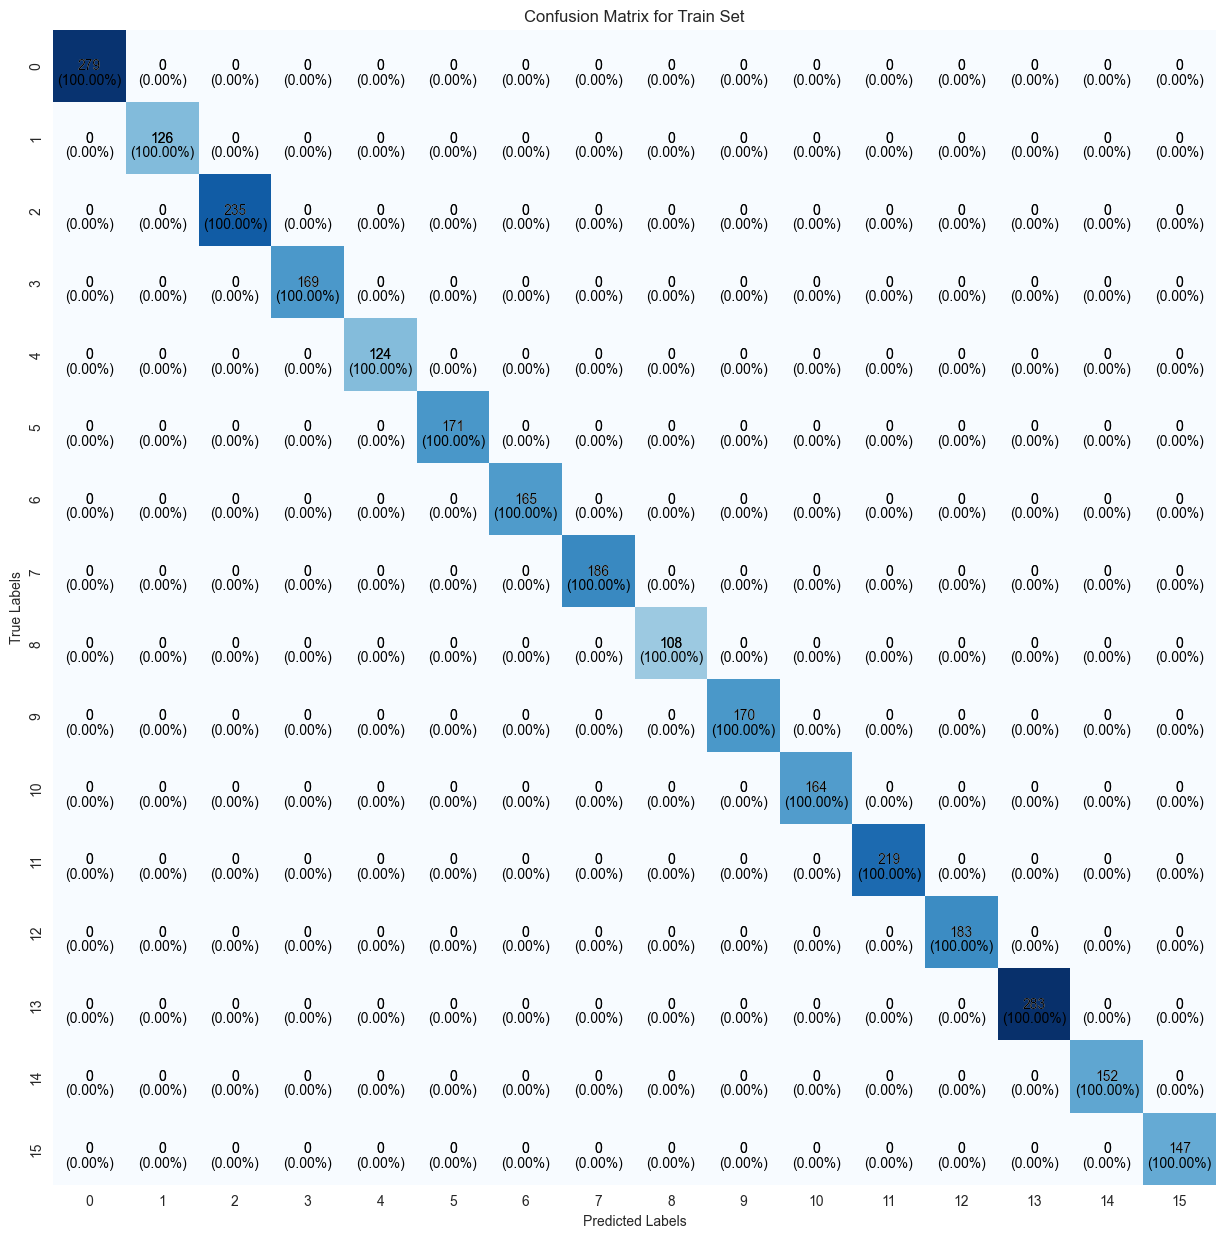

In [54]:
conf_matrix = confusion_matrix(y_train, y_train_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
#print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Train Set')
plt.show()

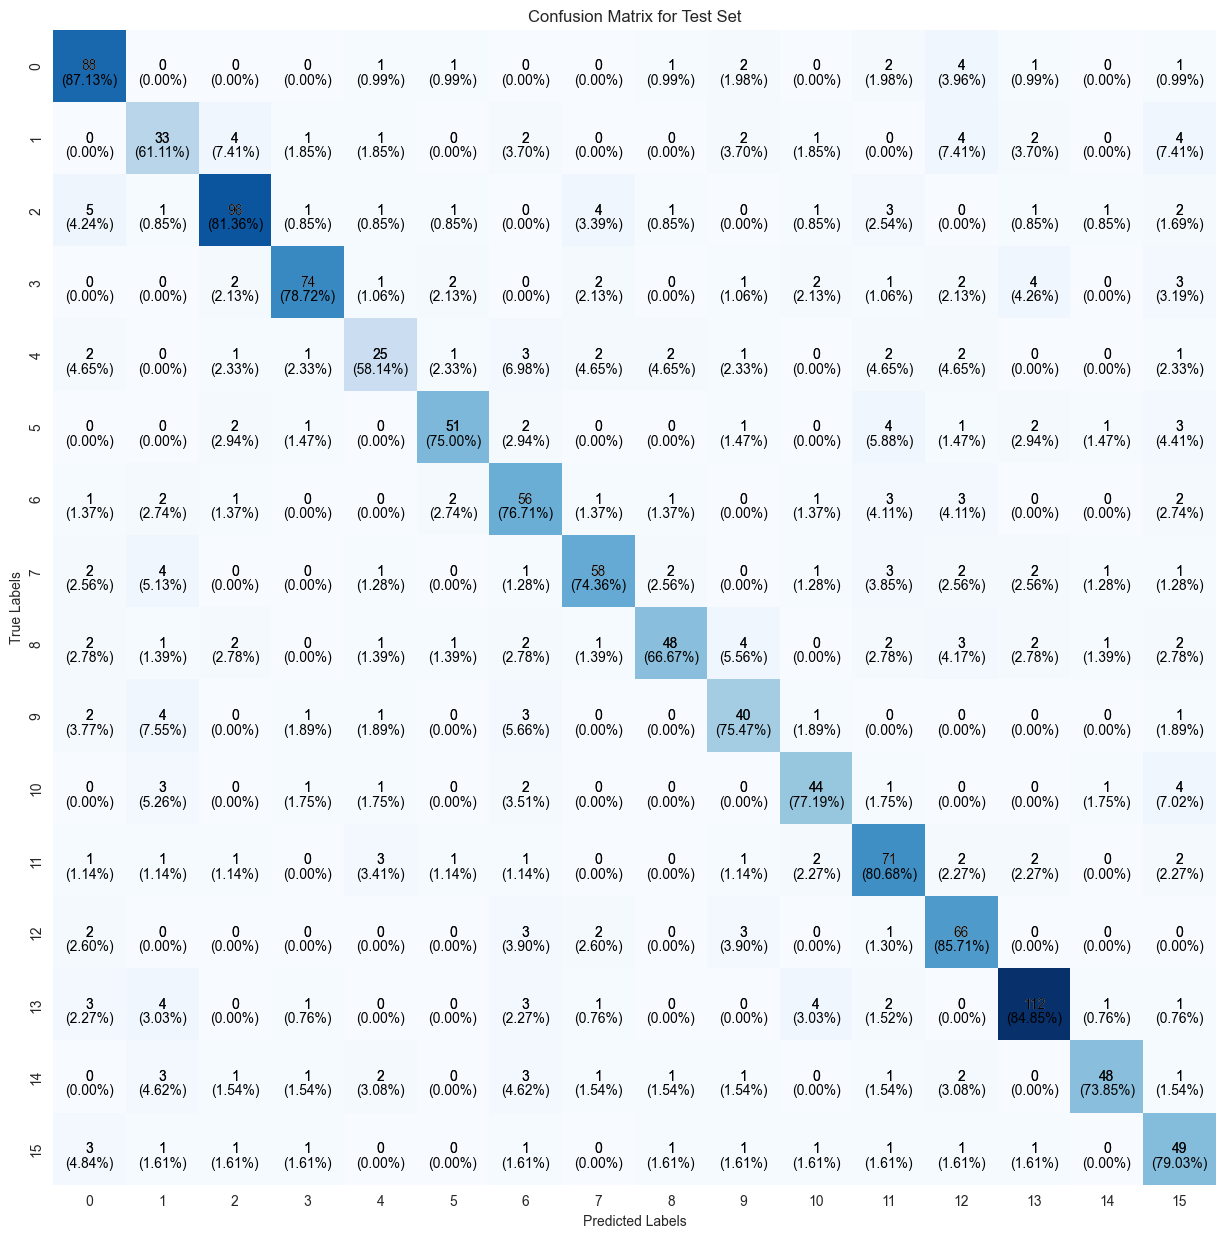

In [55]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
#print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()